In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import pickle
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
from skimage.transform import resize
from skimage.io import imread
from skimage import io, transform

In [3]:
Categories=['1','0']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=r"Dataset"

#create file paths by combining the datadir (data directory) with the filenames 'flat_data.npy
flat_data_file = os.path.join(datadir, 'flat_data.npy')
target_file = os.path.join(datadir, 'target.npy')

if os.path.exists(flat_data_file) and os.path.exists(target_file):
    # Load the existing arrays
    flat_data = np.load(flat_data_file)
    target = np.load(target_file)
else:
    #path which contains all the categories of images
    for i in Categories:
        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        #create file paths by combining the datadir (data directory) with the i
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))#Reads the image using imread.
            img_resized=resize(img_array,(150,150,3)) #Resizes the image to a common size of (150, 150, 3) pixels.
            flat_data_arr.append(img_resized.flatten()) #Flattens the resized image array and adds it to the flat_data_arr.
            target_arr.append(Categories.index(i)) #Adds the index of the category to the target_arr.
            #this index is being used to associate the numerical representation of the category (index) with the actual image data. This is often done to provide labels for machine learning algorithms where classes are represented numerically. In this case, 'ORGANIC' might correspond to label 0, and 'NONORGANIC' might correspond to label 1.
            print(f'loaded category:{i} successfully')
            #After processing all images, it converts the lists to NumPy arrays (flat_data and target).
            flat_data=np.array(flat_data_arr)
            target=np.array(target_arr)
    # Save the arrays(flat_data ,target ) into the files(flat_data.npy,target.npy)
    np.save(os.path.join(datadir, 'flat_data.npy'), flat_data)
    np.save(os.path.join(datadir, 'target.npy'), target)

In [4]:
print(flat_data_file)
target_file

Dataset\flat_data.npy


'Dataset\\target.npy'

In [5]:
len(flat_data_arr)

0

In [6]:
flat_data

array([[0.58864984, 0.6435518 , 0.67884591, ..., 0.54182599, 0.42418412,
        0.38031711],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47845264, 0.35296244, 0.26276637, ..., 0.24010864, 0.18189938,
        0.10200938],
       ...,
       [0.74656998, 0.67956541, 0.62575611, ..., 0.95644771, 0.99598752,
        0.99193568],
       [0.05449816, 0.21136091, 0.21920404, ..., 0.01746358, 0.02701828,
        0.25171877],
       [0.27990965, 0.28775473, 0.28383316, ..., 0.114536  , 0.11733637,
        0.10123463]])

In [7]:
target.sum()

541

In [8]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target #associated the numerical representation of the category (index) with the actual image data
df.shape


(651, 67501)

In [9]:
df

0         1         2         3         4         5         6  \
0    0.588650  0.643552  0.678846  0.604176  0.659086  0.694382  0.607231   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.478453  0.352962  0.262766  0.478851  0.353360  0.263164  0.474205   
3    0.968814  0.759957  0.678559  0.968738  0.770244  0.682631  0.974437   
4    0.768275  0.819196  0.885892  0.746862  0.797780  0.864478  0.727976   
..        ...       ...       ...       ...       ...       ...       ...   
646  0.650919  0.753184  0.886494  0.639389  0.751938  0.893354  0.627037   
647  0.888996  0.932129  0.955660  0.893638  0.935297  0.959565  0.899466   
648  0.746570  0.679565  0.625756  0.855423  0.787567  0.753806  0.744717   
649  0.054498  0.211361  0.219204  0.054731  0.211597  0.219440  0.054106   
650  0.279910  0.287755  0.283833  0.281761  0.289605  0.285683  0.279950   

            7         8         9  ...     67491     67492     67493  \
0    0.664764  0.700935  0.605744  ...  0.333835  0.272986  0.239167   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.348715  0.258519  0.472749  ...  0.393247  0.298884  0.170161   
3    0.775310  0.691207  0.986527  ...  0.508312  0.425271  0.372319   
4    0.776739  0.844298  0.723844  ...  0.188376  0.163631  0.149622   
..        ...       ...       ...  ...       ...       ...       ...   
646  0.751085  0.890809  0.618656  ...  0.203274  0.186874  0.191372   
647  0.935232  0.962448  0.903601  ...  0.797460  0.841104  0.864507   
648  0.669339  0.611302  0.570643  ...  0.941240  0.998553  0.992970   
649  0.211855  0.219698  0.054994  ...  0.011371  0.054051  0.201577   
650  0.287793  0.283872  0.277726  ...  0.153540  0.154089  0.145829   

        67494     67495     67496     67497     67498     67499  Target  
0    0.347003  0.268365  0.231014  0.541826  0.424184  0.380317       0  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000       0  
2    0.314401  0.246731  0.140728  0.240109  0.181899  0.102009       0  
3    0.504578  0.420921  0.364362  0.537385  0.454386  0.399171       0  
4    0.282714  0.246597  0.236858  0.320268  0.277642  0.269775       0  
..        ...       ...       ...       ...       ...       ...     ...  
646  0.206581  0.184759  0.185110  0.227055  0.209428  0.210937       1  
647  0.795420  0.838563  0.862093  0.770250  0.813387  0.836917       1  
648  0.954099  0.996539  0.991397  0.956448  0.995988  0.991936       1  
649  0.008627  0.036608  0.207755  0.017464  0.027018  0.251719       1  
650  0.107878  0.108455  0.098905  0.114536  0.117336  0.101235       1  

[651 rows x 67501 columns]

In [10]:
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
          67491,    67492,    67493,    67494,    67495,    67496,    67497,
          67498,    67499, 'Target'],
      dtype='object', length=67501)

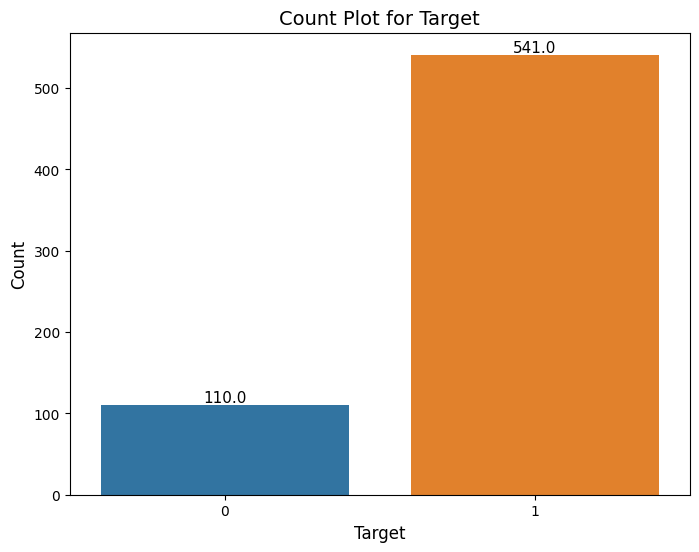

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Target')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count Plot for Target', fontsize=14)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [12]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]
y
x

0         1         2         3         4         5         6      \
0    0.588650  0.643552  0.678846  0.604176  0.659086  0.694382  0.607231   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.478453  0.352962  0.262766  0.478851  0.353360  0.263164  0.474205   
3    0.968814  0.759957  0.678559  0.968738  0.770244  0.682631  0.974437   
4    0.768275  0.819196  0.885892  0.746862  0.797780  0.864478  0.727976   
..        ...       ...       ...       ...       ...       ...       ...   
646  0.650919  0.753184  0.886494  0.639389  0.751938  0.893354  0.627037   
647  0.888996  0.932129  0.955660  0.893638  0.935297  0.959565  0.899466   
648  0.746570  0.679565  0.625756  0.855423  0.787567  0.753806  0.744717   
649  0.054498  0.211361  0.219204  0.054731  0.211597  0.219440  0.054106   
650  0.279910  0.287755  0.283833  0.281761  0.289605  0.285683  0.279950   

        7         8         9      ...     67490     67491     67492  \
0    0.664764  0.700935  0.605744  ...  0.461666  0.333835  0.272986   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.348715  0.258519  0.472749  ...  0.229270  0.393247  0.298884   
3    0.775310  0.691207  0.986527  ...  0.366094  0.508312  0.425271   
4    0.776739  0.844298  0.723844  ...  0.161217  0.188376  0.163631   
..        ...       ...       ...  ...       ...       ...       ...   
646  0.751085  0.890809  0.618656  ...  0.223643  0.203274  0.186874   
647  0.935232  0.962448  0.903601  ...  0.866398  0.797460  0.841104   
648  0.669339  0.611302  0.570643  ...  0.992457  0.941240  0.998553   
649  0.211855  0.219698  0.054994  ...  0.152918  0.011371  0.054051   
650  0.287793  0.283872  0.277726  ...  0.202048  0.153540  0.154089   

        67493     67494     67495     67496     67497     67498     67499  
0    0.239167  0.347003  0.268365  0.231014  0.541826  0.424184  0.380317  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.170161  0.314401  0.246731  0.140728  0.240109  0.181899  0.102009  
3    0.372319  0.504578  0.420921  0.364362  0.537385  0.454386  0.399171  
4    0.149622  0.282714  0.246597  0.236858  0.320268  0.277642  0.269775  
..        ...       ...       ...       ...       ...       ...       ...  
646  0.191372  0.206581  0.184759  0.185110  0.227055  0.209428  0.210937  
647  0.864507  0.795420  0.838563  0.862093  0.770250  0.813387  0.836917  
648  0.992970  0.954099  0.996539  0.991397  0.956448  0.995988  0.991936  
649  0.201577  0.008627  0.036608  0.207755  0.017464  0.027018  0.251719  
650  0.145829  0.107878  0.108455  0.098905  0.114536  0.117336  0.101235  

[651 rows x 67500 columns]

In [13]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=77)


In [14]:
#Naivebayes classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
# Initializing and training the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred1 = nb_classifier.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generating a classification report
report = classification_report(y_test, y_pred1)
print("\nNaive Bayes model classification_report:\n",report)

Accuracy: 72.41%

Naive Bayes model classification_report:
               precision    recall  f1-score   support

           0       0.35      0.73      0.48        45
           1       0.93      0.72      0.81       216

    accuracy                           0.72       261
   macro avg       0.64      0.73      0.65       261
weighted avg       0.83      0.72      0.75       261



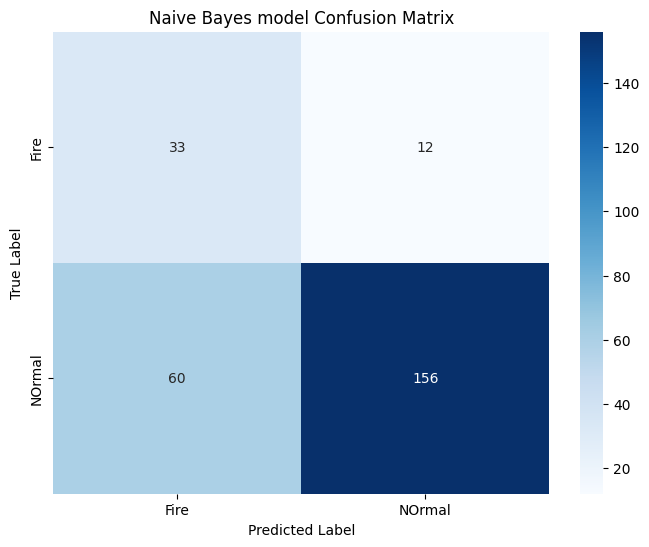

In [16]:
cm=confusion_matrix(y_test,y_pred1)
class_labels=['Fire','NOrmal']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes model Confusion Matrix")
plt.show()

In [17]:
#SVM classifier

In [18]:
filename = 'Classifier.pkl'
if os.path.exists('Classifier.pkl'):
    # Load the trained model from the Pickle file
    with open(filename, 'rb') as Model_pkl:
        svc= pickle.load(Model_pkl)
        y_pred=svc.predict(x_test)
        Acc=accuracy_score(y_test,y_pred)*100
        print("Accuracy",Acc)
else:
    # Create an SVM classifier
    classifier = SVC(kernel='linear', C=1.0, random_state=42)   
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(x_test)
    Acc=accuracy_score(y_test,y_pred)*100
    print("Accuracy",Acc)
    # Dump the trained Naive Bayes classifier with Pickle
    filename = 'Classifier.pkl'
    # Open the file to save as pkl file
    Model_pkl = open(filename, 'wb')
    #when you use 'wb' as the mode when opening a file, you are telling Python to open the file in write mode and treat it as a binary file. This is commonly used when saving non-textual data, such as images, audio, or serialized objects like machine learning models
    pickle.dump(svc, Model_pkl)
    #function to serialize and save the object (which is your trained model) into the Pickle file opened as Model_pkl.
    # Close the pickle instances
    Model_pkl.close()

Accuracy 86.59003831417624


In [19]:
Acc=accuracy_score(y_test,y_pred)*100
print("Accuracy",Acc)

Accuracy 86.59003831417624


In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 16,  29],
       [  6, 210]], dtype=int64)

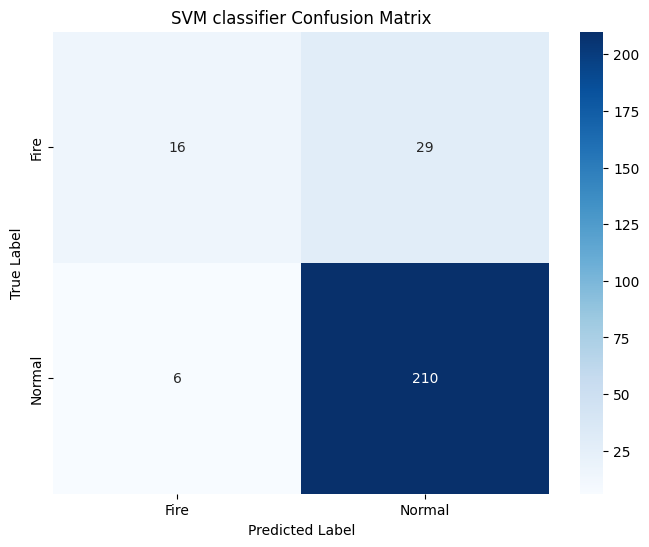

In [21]:
class_labels=['Fire','Normal']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM classifier Confusion Matrix")
plt.show()

In [22]:
report=classification_report(y_test,y_pred)
print("SVM classifier classification report\n",report)

SVM classifier classification report
               precision    recall  f1-score   support

           0       0.73      0.36      0.48        45
           1       0.88      0.97      0.92       216

    accuracy                           0.87       261
   macro avg       0.80      0.66      0.70       261
weighted avg       0.85      0.87      0.85       261



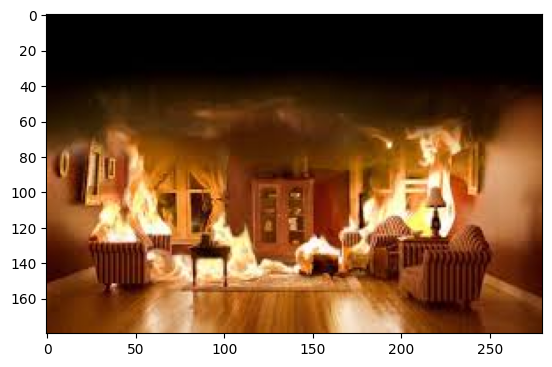

The predicted image is: FIRE


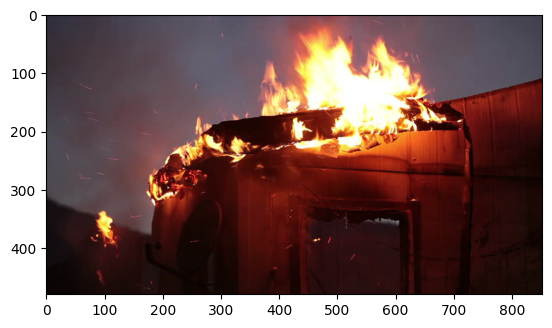

The predicted image is: FIRE


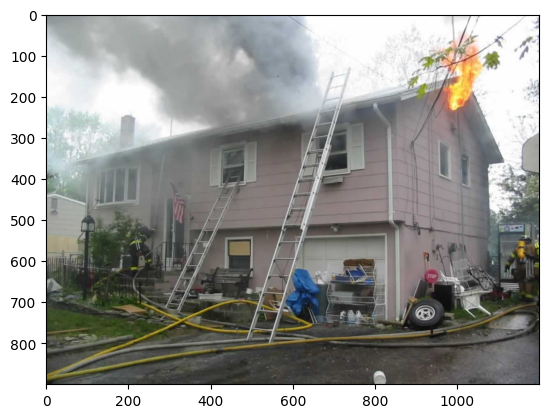

The predicted image is: FIRE


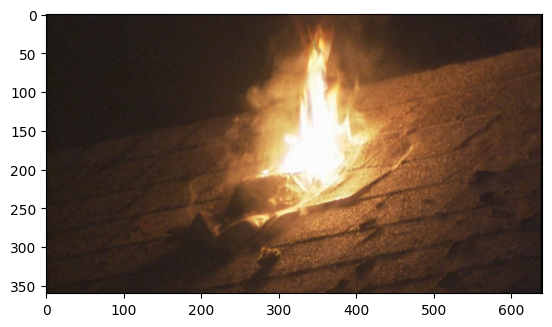

The predicted image is: FIRE


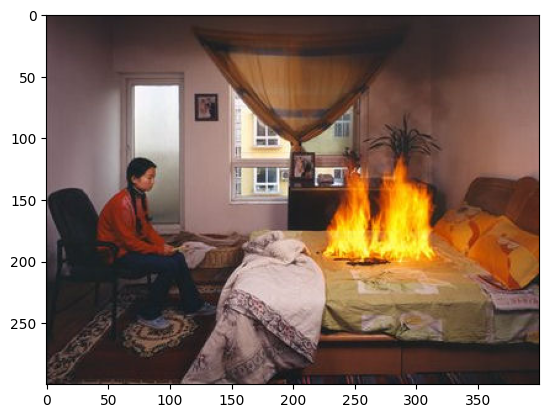

The predicted image is: FIRE


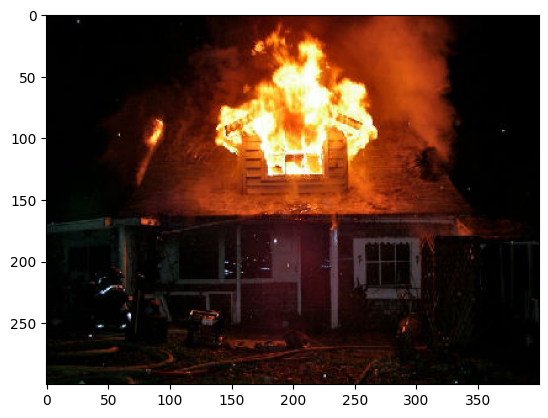

The predicted image is: FIRE


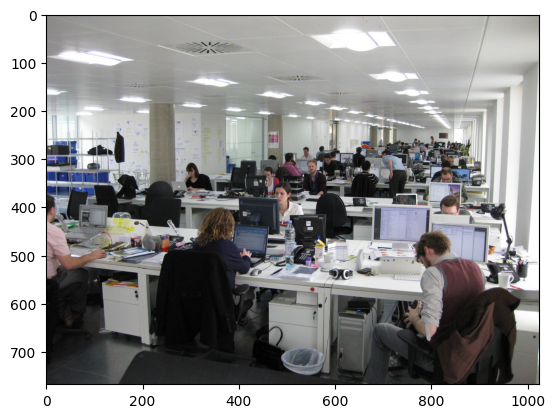

The predicted image is: NORMAL


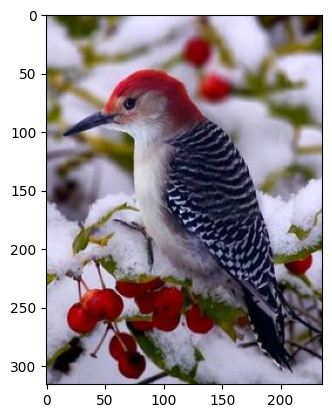

The predicted image is: NORMAL


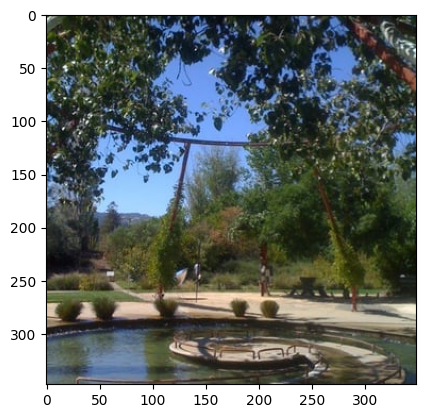

The predicted image is: NORMAL


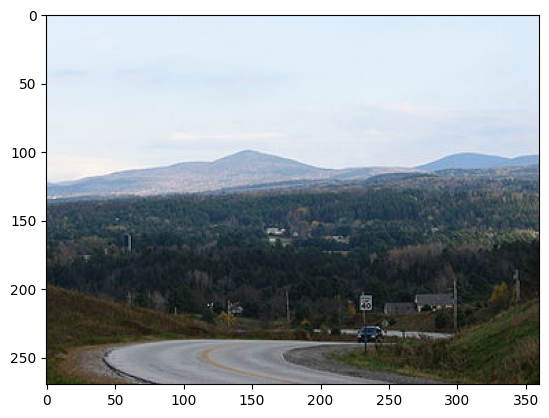

The predicted image is: NORMAL


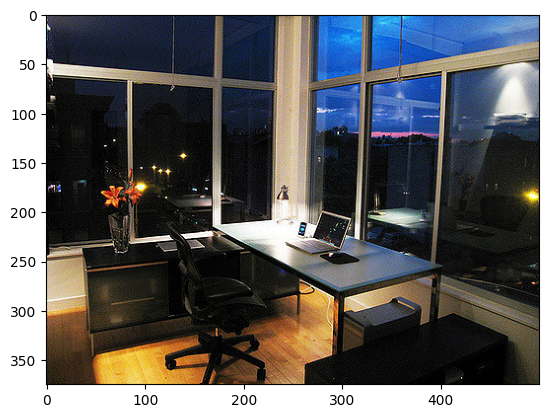

The predicted image is: NORMAL


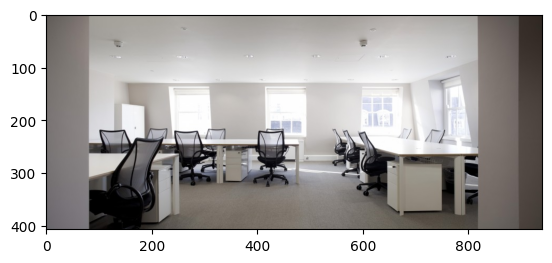

The predicted image is: NORMAL


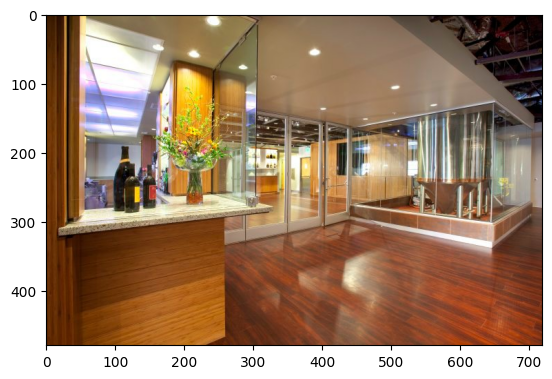

The predicted image is: NORMAL


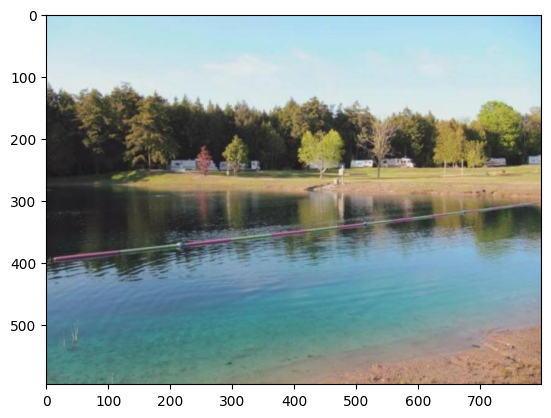

The predicted image is: NORMAL


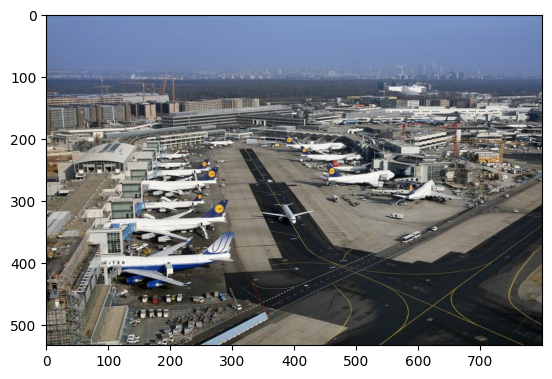

The predicted image is: NORMAL


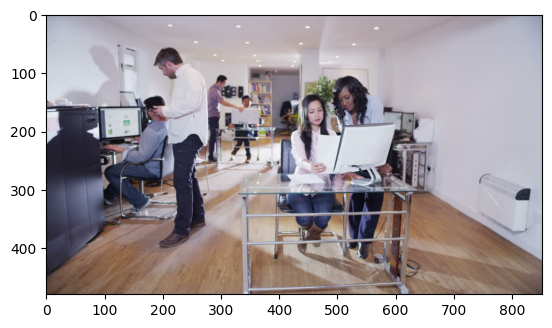

The predicted image is: NORMAL


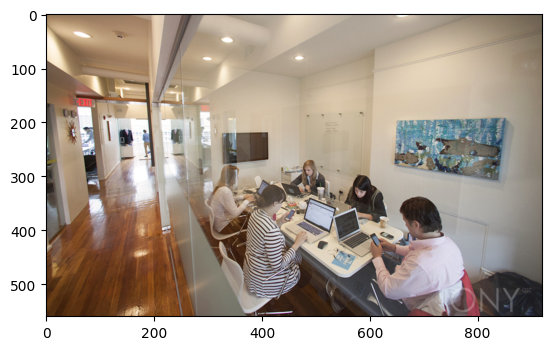

The predicted image is: NORMAL


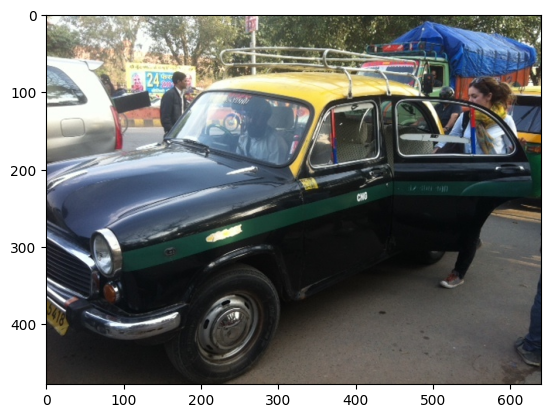

The predicted image is: NORMAL


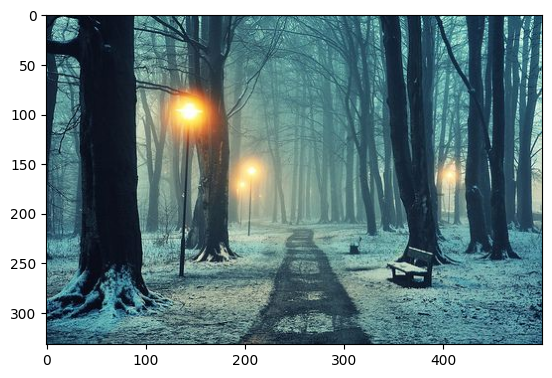

The predicted image is: NORMAL


In [23]:
path = r"testing"
Categories = {1:'NORMAL',0:'FIRE'}  # Define your categories with corresponding labels
for filename in os.listdir(path):
    img_path = os.path.join(path, filename)  # Construct the complete image path
    img = imread(img_path)
    plt.imshow(img)
    plt.show()
    img_resize = resize(img, (150, 150, 3))
    l = [img_resize.flatten()]
    # Make predictions using your pre-trained model
    prediction = svc.predict(l)[0]
    predicted_category = Categories[prediction]
    print("The predicted image is:", predicted_category)
